In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [38]:
df = pd.read_csv('/content/placement.csv')

In [39]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package in LPA')

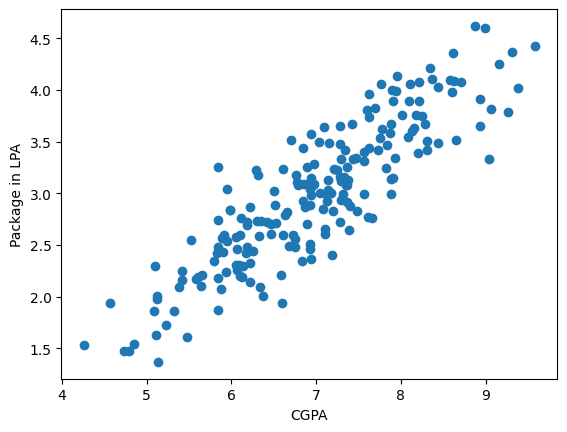

In [40]:

plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')

In [41]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [42]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [44]:
from sklearn.linear_model import LinearRegression


In [45]:
lr = LinearRegression()


In [46]:
lr.fit(X_train,y_train)


LinearRegression()

In [47]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [48]:
y_test

,package
112,4.10
29,3.49
182,2.08
199,2.33
193,1.94
85,1.48
10,1.86
54,3.09
115,4.21
35,2.87


In [49]:
# for this we are calcualting the values of the 112 number student package
# whose cgpa is 8.5 and package is 4.10


In [50]:
lr.predict(X_test.iloc[0].values.reshape(1,1))


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

In [51]:
# VALUES:-
# .iloc[0] → first row

# .iloc[:, 0] → first column

# .iloc[0, 0] → first row and first column (a single value)

# .values -> We convert it into a NumPy array because scikit-learn models (lr.predict) don’t accept Pandas Series directly — they expect the input in the form of a NumPy array
# . .reshape(1,1)

# lr.predict() (scikit-learn models) expects a 2D array: shape (n_samples, n_features).

# . lr.predict(...)

# Passes the reshaped array into the trained Linear Regression model (lr) to predict the output (y value).


Text(0, 0.5, 'Package in LPA')

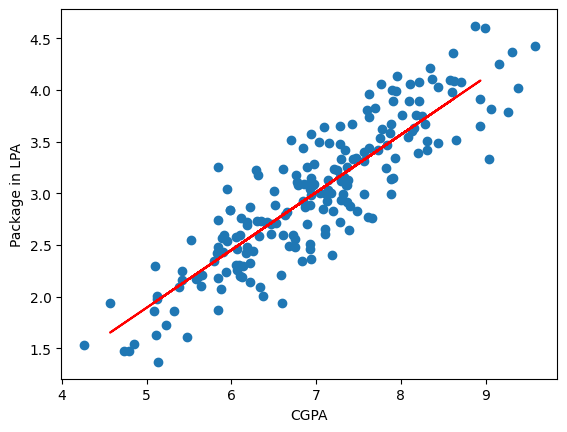

In [52]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_test,lr.predict(X_test),color = 'red')
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')

In [53]:
m = lr.coef_
m

array([0.55795197])

In [54]:
b = lr.intercept_
b

np.float64(-0.8961119222429144)

In [55]:
# Inside this what this algo do

**(Y = MX+B) it is using this formula**


In [56]:
m *8.58 +b

# what is this 8.58 it is the first input value we have

array([3.89111601])

**For any New Input X We can Also do the prediction**

In [57]:
m *9.5 + b

# new input 9.5

array([4.40443183])

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [61]:
y_pred = lr.predict(X_test)

In [63]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [64]:
print('MAE',mean_absolute_error(y_test,y_pred))

MSE 0.2884710931878175


In [65]:
print('MSE',mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [67]:
print('RSME',np.sqrt(mean_squared_error(y_test,y_pred)))

RSME 0.34827051717731616


In [72]:
print('R2Score',r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2Score 0.780730147510384


In [73]:
# ADJUSTED R2 SCORE

In [74]:
X_test.shape

(40, 1)

In [75]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415